In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset
from transformer_lens import HookedTransformer, HookedTransformerConfig

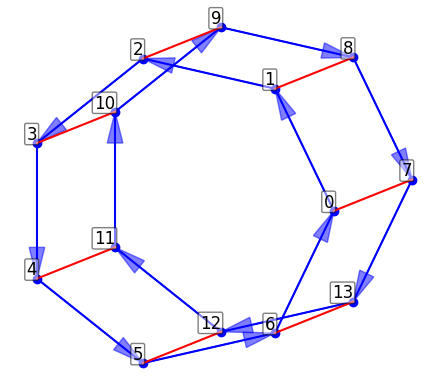

In [30]:
class DihedralGroupTools:
    def __init__(self, degree: int):
        self.degree: int = degree
        self.n_actions: int = 2
        self.n_states: int = degree * self.n_actions

    def apply_action(self, state: int, action: int) -> int:
        if action == 0:
            # flip
            return state ^ 1
        else:
            return (state + 1) % self.degree + (state // self.degree)
              

    def plot_group(self):
        # red for 0 edges and blue for 1 edges
        angles = np.linspace(0, 2 * np.pi, self.degree, endpoint=False)
        x1 = np.cos(angles)
        y1 = np.sin(angles)
        x2 = np.cos(angles) + 0.5
        y2 = np.sin(angles) + 0.2

        fig, ax = plt.subplots()
        # Plot the first n-gon (rotations, clockwise)
        for i in range(self.degree):
            next_i = (i + 1) % self.degree
            ax.plot([x1[i], x1[next_i]], [y1[i], y1[next_i]], color='blue')
            self._draw_arrow(ax, x1[i], y1[i], x1[next_i], y1[next_i], color='blue')

        # Plot the second n-gon (reflections, counter-clockwise)
        for i in range(self.degree):
            next_i = (i - 1) % self.degree
            ax.plot([x2[i], x2[next_i]], [y2[i], y2[next_i]], color='blue')
            self._draw_arrow(ax, x2[i], y2[i], x2[next_i], y2[next_i], color='blue')

        # Connect corresponding vertices with red edges
        for i in range(self.degree):
            ax.plot([x1[i], x2[i]], [y1[i], y2[i]], color='red')

        # Mark and label nodes
        ax.scatter(x1, y1, color='blue')  # Mark nodes for the first n-gon
        ax.scatter(x2, y2, color='blue')  # Mark nodes for the second n-gon
        for i, (x, y) in enumerate(zip(np.concatenate((x1, x2)), np.concatenate((y1, y2)))):
            ax.text(
                x, y, 
                str(i), 
                color='black', 
                fontsize=12, 
                ha='right', 
                va='bottom',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.5)
            )

        ax.set_aspect('equal')
        plt.axis('off')
        plt.show()
    
    def _draw_arrow(
            self, 
            ax, 
            x_start, y_start, 
            x_end, y_end, 
            color='blue',
            head_length=0.2,
            alpha=0.5,
        ):
        """Draws an arrow from start to end with a slight offset for visibility."""
        dx = x_end - x_start
        dy = y_end - y_start
        length = np.sqrt(dx**2 + dy**2)
        length_factor = (length - head_length) / length
        dx = dx * length_factor
        dy = dy * length_factor
        ax.arrow(x_start, y_start, dx, dy, head_width=0.1, head_length=0.2, fc=color, ec=color, alpha=alpha)


DihedralGroupTools(7).plot_group()

In [ ]:
# wip
class DihedralDataset(Dataset):
	def __init__(
			self, 
			degree: int, 
			n_samples: int = 100,
		):
		self.n_actions: int = 2
		self.degree: int = degree
		self.n_states: int = degree * self.n_actions # flips and rotations
		self.n_samples: int = n_samples

	def get_model_config_kwargs(self):
		return dict(
			d_vocab=self.n_actions,
			d_vocab_out=self.n_states,
		)
	
	def __len__(self):
		return self.n_samples
	

		